In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch 
from torchvision import datasets, transforms

import helper

The easiest way to load image data is with *datasets.ImageFolder* from *torchvision*. In generall we'll use *ImageFolder* like so:

```
dataset = datasets.ImageFolder('path/to/data',
                                transform=transform)
```
ImageFolder expects the files and directories to be constructed like so:

```
root/dog/xxx.png
root/dog/xxy.ong

root/cat/123.png
root/cat/sad.png
```

## Transforms

We can either resize them with *transforms.Resize()* or crop with *transforms.CenterCrop()*, *transforms.RandomResizedCrop()* . We'll also need to convert the images to PyTorch tensors with *transforms.ToTensor()*.

## Data Loaders

With the *ImageFolder* loaded, we have to pass it to a *DataLoader*. It takes a dataset and returns batches of images and the corresponding labels. We can set various parameters.

```
dataloader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=32,
                    shuffle=True)
```

Here dataloader is a *generator*. To get out of it, we need to loop through it or convert it to an iterator and call *next()*

```
# looping thrpugh it, get batch on each loop
for images, labels in dataloader:
    pass
    
# Get one batch
images, labels = next(iter(dataloader))
```

**Exercise**

Load images from the *Cat_Dog_data/train* folder, define a few transforms, then build the dataloader.

In [2]:
data_dir = 'Cat_Dog_data/train'
# compose transforms
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
# create the ImageFolder
dataset = datasets.ImageFolder(data_dir, 
                               transform=transform)
# use the ImageFolder dataset to create the DataLoader
dataloader = torch.utils.data.DataLoader(dataset, 
                                         batch_size=32, 
                                         shuffle=True)

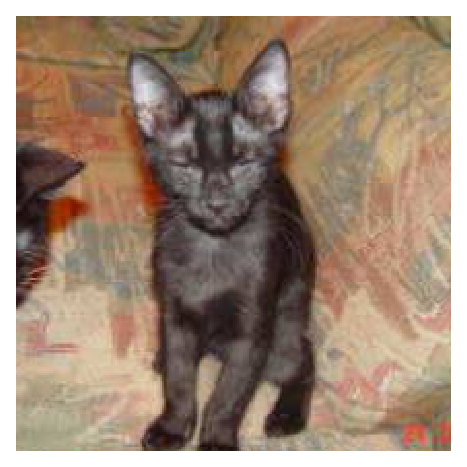

In [3]:
# Test the dataset
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)

## Data Augmentation

```
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])
```

We can pass a list of means and list of standard deviations, then the color channels are normalized like so

```
input[channel] = (input[channel] - mean[channel]) / std[channel]
```

Subtracting mean centers the data around zero and dividing by std squishes the values to be between -1 and 1. Normalizing helps keep the network work weights near zero which in turn makes backpropagation more stable. Without normalization, networks will tend to fail to learn.

When we're testing however, we'll want to use images that aren't altered. So, for validation/test images, we'll typically just resize and crop.

**Exercise**

Define transforms for trainin data and testing data below. Leave off normalization for now.

In [4]:
data_dir = 'Cat_Dog_data/'

# Define transforms the training data and 
# testing data
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
    #transforms.Normalize([0.5, 0.5, 0.5],
    #                     [0.5, 0.5, 0.5])
])

test_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor()
])

# Pass transforms in here, then turn the next
# cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', 
                                  transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', 
                                  transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, 
                                          batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=32)

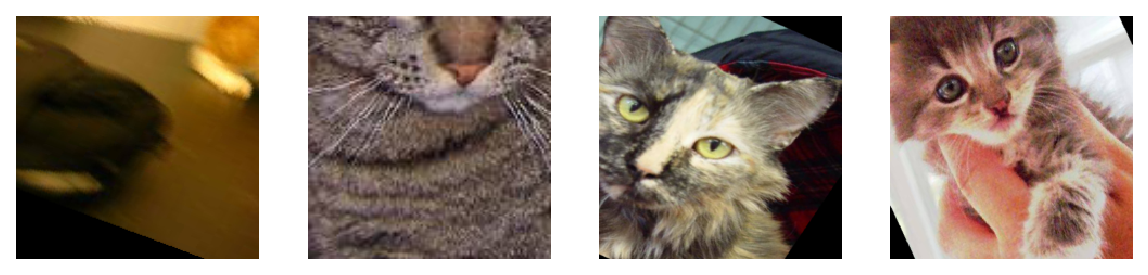

In [6]:
# change this to the trainloader or testloader
data_iter = iter(trainloader)

images, labels = next(data_iter)

fig, axes = plt.subplots(figsize=(10,4), ncols=4)

for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], 
                  ax=ax, 
                  normalize=False)